# 2. Badanie intensywności procesów punktowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
sns.set() 
sns.set_theme(style="whitegrid")

### Dodanie przygotowanych poprzednio funkcji

In [2]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim): 
    ExpValue = intensity*((x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0]))
    n = np.random.poisson(ExpValue)
    x = np.random.uniform(x_lim[0], x_lim[1], n)
    y = np.random.uniform(y_lim[0], y_lim[1], n)
    
    xx = x.flatten()
    yy = y.flatten()
    df_HP = pd.DataFrame(data = {"X": xx,"Y": yy})
    return df_HP


def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    Intensity = max([max(x_lim), max(y_lim)])
    ExpValue = Intensity*((x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0]))
    
    n = np.random.poisson(ExpValue)
    
    x = np.random.uniform(x_lim[0], x_lim[1], n)
    y = np.random.uniform(y_lim[0], y_lim[1], n)  
    x = x.flatten()
    y = y.flatten()
    
    xx = []
    yy = []
    
    for i in range(len(x)):
        if(random.uniform(0, 1) > (1-intensity_function(x[i], y[i])/Intensity)):
            xx.append(x[i])
            yy.append(y[i])

    
    df_UP = pd.DataFrame(data = {"X": xx,"Y": yy})

    return df_UP


def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    xLimMinExt = x_lim[0] - cluster_radius
    xLimMaxExt = x_lim[1] + cluster_radius
    yLimMinExt = y_lim[0] - cluster_radius
    yLimMaxExt = y_lim[1] + cluster_radius
    
    
    areaTotalExt = (xLimMaxExt - xLimMinExt) * (yLimMaxExt - yLimMinExt)  

    numbPointsParent = np.random.poisson(areaTotalExt * parent_intensity)  

    
    xxParent = xLimMinExt + (xLimMaxExt - xLimMinExt) * np.random.uniform(0, 1, numbPointsParent)
    yyParent = yLimMinExt + (yLimMaxExt - yLimMinExt) * np.random.uniform(0, 1, numbPointsParent)

    numbPointsDaughter = np.random.poisson(daughter_intensity, numbPointsParent)
    numbPoints = sum(numbPointsDaughter)  


    theta = 2 * np.pi * np.random.uniform(0, 1, numbPoints)  
    gamma = cluster_radius * np.sqrt(np.random.uniform(0, 1, numbPoints))  
    
    xx0 = theta * np.cos(theta)
    yy0 = gamma * np.sin(gamma) 
    
    
    xx = np.repeat(xxParent, numbPointsDaughter)
    yy = np.repeat(yyParent, numbPointsDaughter)

    xx = xx + xx0
    yy = yy + yy0

    
    trimed = ((xx >= x_lim[0]) & (xx <= x_lim[1]) & (yy >= y_lim[0]) & (yy <= y_lim[1]))
    xx = xx[trimed]
    yy = yy[trimed]

    
    df_M = pd.DataFrame(data = {"X": xx,"Y": yy})
    
    return df_M


def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    rExt=4*cluster_sigma
    
    xMinExt = x_lim[0] - rExt
    xMaxExt = x_lim[1] + rExt
    yMinExt = y_lim[0] - rExt
    yMaxExt = y_lim[1] + rExt

    areaTotalExt = (xMaxExt - xMinExt) * (yMaxExt - yMinExt)  


    numbPointsParent = np.random.poisson(areaTotalExt * parent_intensity)
    
    xxParent = xMinExt + (xMaxExt - xMinExt) * np.random.uniform(0, 1, numbPointsParent)
    yyParent = yMinExt + (yMaxExt - yMinExt)  * np.random.uniform(0, 1, numbPointsParent)

    numbPointsDaughter = np.random.poisson(mean_cluster_size, numbPointsParent)
    numbPoints = sum(numbPointsDaughter) 


    xx0 = np.random.normal(0, cluster_sigma, numbPoints)
    yy0 = np.random.normal(0, cluster_sigma, numbPoints) 

    
    xx = np.repeat(xxParent, numbPointsDaughter)
    yy = np.repeat(yyParent, numbPointsDaughter)

    
    xx = xx + xx0
    yy = yy + yy0

    
    trimed = ((xx >= x_lim[0]) & (xx <= x_lim[1]) & (yy >= y_lim[0]) & (yy <= y_lim[1]))
    xx = xx[trimed] 
    yy = yy[trimed]

    
    df_T = pd.DataFrame(data = {'X':xx,'Y':yy})

    return(df_T)

### Przygotowanie danych

Wygenerowanie rozkładów punktowych o podanych paramatrach z wykorzystaniem przygotowanych poprzedniu funkcji.

Jednorodny rozkłada Poissona:
 - intensywność procesu: 20
 
Niejednorodny rozkład Poissona:
 - intensywność procesu: f(x, y) = $10(cos(\frac{\pi}{4} x)+1)$

Rozkład Materna:
 - intensywność procesu macierzystego: 0.15
 - intensywność procesu potomnego: 15
 - promień klastra: 1.25
 
Rozkład Thomasa:
 - intensywność procesu macierzystego: 0.3
 - średnia liczebność klastra: 20
 - odchylenie standardowe klastra: 0.75

Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [-10, 10]
 - zakres wartości współrzędnej y: [-5, 5]

In [3]:
def intensity_function(x, y):
    intensity = 10*(math.cos((math.pi/4)*x)+1)
    return intensity

HP = homogeneous_poisson_on_rectangle(20, [-10,10], [-5,5])
M = materna_on_rectangle(0.15, 15, 1.25, [-10,10], [-5,5])
T = thomas_on_rectangle(0.23, 20, 0.75, [-10,10], [-5,5])
UP = unhomogeneous_poisson_on_rectangle(intensity_function, [-10,10], [-5,5])

### Badanie intensywności procesu punktowego metodą szacowania lokalnego

Funkcja `point_count_on_subregions()`, zlicza punkty w obrębie prostokątnych podobszarów.

Funkcja `intensity_on_subregions()`, oblicza intensywność procesu punktowego w obrębie prostokątnych podobszarów.

PoWykorzystano przygotowane funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Ustawiono paramet `bins` na 40 podobszarów wzdłuż osi $x$ i 20 podobszarów wzdłuż osi $y$.

#### a) Przygotowanie funkcji

In [4]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    
    hist = np.histogram2d(points["X"],points["Y"], bins,[x_lim,y_lim])
    hist = list(hist)
    hist[0] = hist[0].T

    return(hist)


def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """ 

    hist = point_count_on_subregions(points, bins, x_lim, y_lim)
    area = abs(hist[1][0] - hist[1][1])*abs(hist[2][0] - hist[2][1])
    
    
    hist[0] = hist[0]/area

    return (hist)

#### b) Wygenerowanie danych

In [5]:
hist_M = intensity_on_subregions(M, [40,20], [-10,10], [-5,5])
hist_HP = intensity_on_subregions(HP, [40,20], [-10,10], [-5,5])
hist_T = intensity_on_subregions(T, [40,20], [-10,10], [-5,5])
hist_UP = intensity_on_subregions(UP, [40,20], [-10,10], [-5,5])

#### c) Wizualizacja

(-5.0, 5.0)

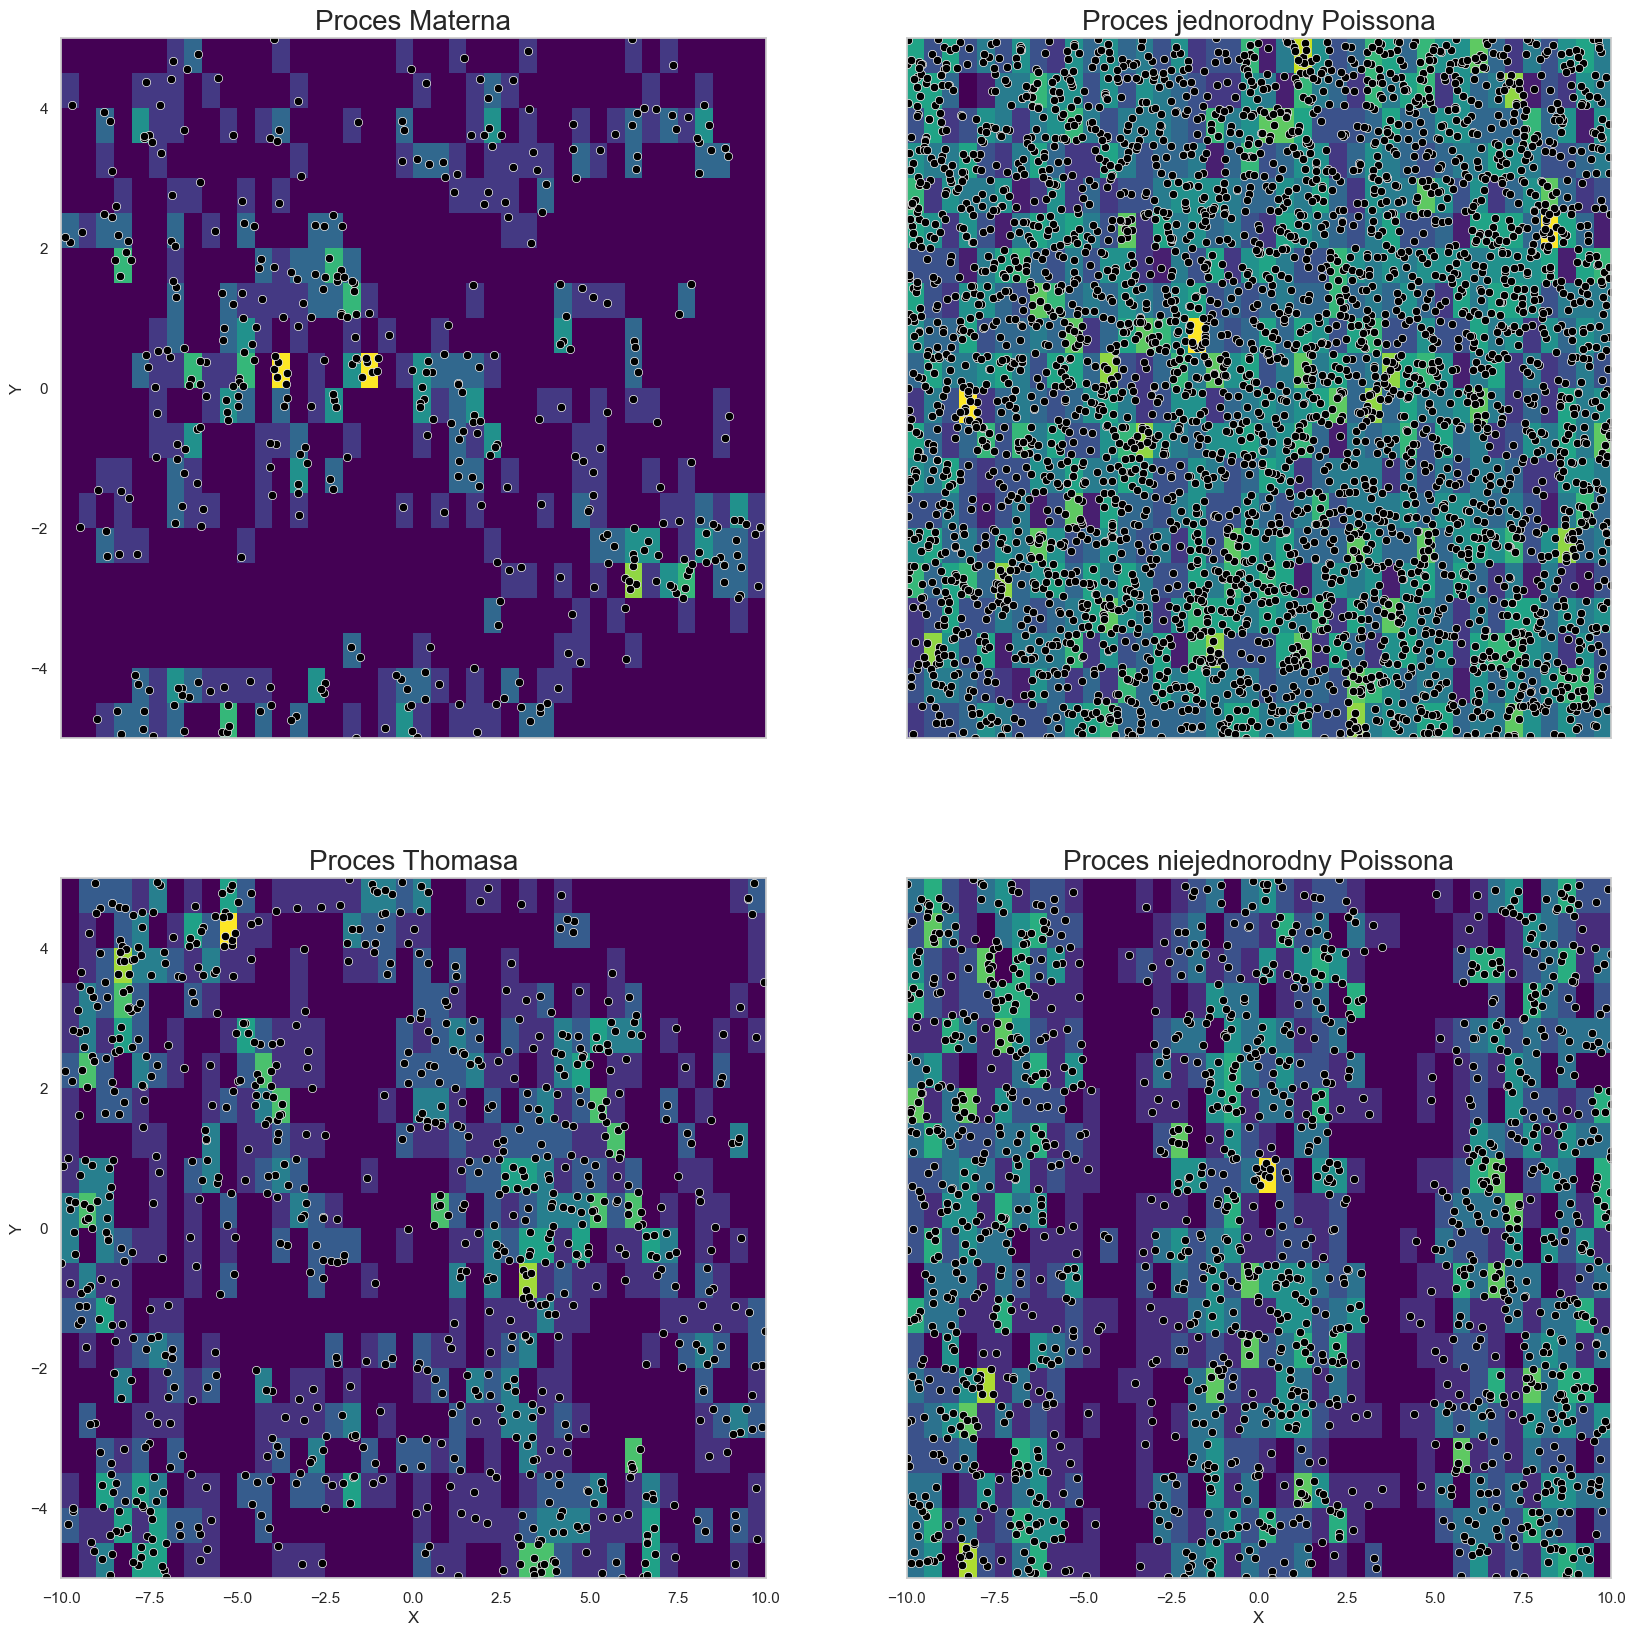

In [6]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20,20))

axs[0,0].pcolormesh(hist_M[1],hist_M[2],hist_M[0],cmap = 'viridis')
sns.scatterplot(data = M, x = "X",y = "Y", ax = axs[0,0],color = "Black")
axs[0, 0].set_title('Proces Materna', fontsize=20)
axs[0,0].set_xlim(-10,10)
axs[0,0].set_ylim(-5,5)

axs[0,1].pcolormesh(hist_HP[1],hist_HP[2],hist_HP[0],cmap = 'viridis')
sns.scatterplot(data = HP, x = "X",y = "Y", ax = axs[0,1],color = "Black")
axs[0, 1].set_title('Proces jednorodny Poissona', fontsize=20)
axs[0,1].set_xlim(-10,10)
axs[0,1].set_ylim(-5,5)

axs[1,0].pcolormesh(hist_T[1],hist_T[2],hist_T[0],cmap = 'viridis')
sns.scatterplot(data = T, x = "X",y = "Y", ax = axs[1,0],color = "Black")
axs[1, 0].set_title('Proces Thomasa', fontsize=20)
axs[1,0].set_xlim(-10,10)
axs[1,0].set_ylim(-5,5)

axs[1,1].pcolormesh(hist_UP[1],hist_UP[2],hist_UP[0],cmap = 'viridis')
sns.scatterplot(data = UP, x = "X",y = "Y", ax = axs[1,1],color = "Black")
axs[1, 1].set_title('Proces niejednorodny Poissona', fontsize=20)
axs[1,1].set_xlim(-10,10)
axs[1,1].set_ylim(-5,5)

### 2. Badanie intensywności procesu punktowego metodą funkcji jądrowych

Przygotowanie funkcji `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora funkcji intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2} (1-\frac{d_i^2}{\tau^2})^2$$ 

gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Wykorzystano przygotowaną funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Przyjmując promień funkcji jądrowej równy 1.5 i ustawiając siatkę jako  200x100 regularnie rozłożonych i pokrywających cały obszar punktów.

Funkcja nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związu z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [7]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    
    points_X = list(points['X'])
    points_Y = list(points['Y'])
    
    
    x = np.linspace((x_lim[0]),(x_lim[1]),grid[0])
    y = np.linspace((y_lim[0]),(y_lim[1]),grid[1])
    
    
    xx,yy = np.meshgrid(x,y)
    
    grid_X = xx.flatten()
    grid_Y = yy.flatten()
    
    grid_X = np.asarray(grid_X)
    grid_Y= np.asarray(grid_Y)
    
    intensity = np.zeros_like(grid_X)

    
    for i in range(np.shape(intensity)[0]):
        for j in range(np.shape(points_X)[0]):
            
            dist = math.dist([grid_X[i],grid_Y[i]], [points_X[j],points_Y[j]])
            
            if dist <= kernel_radius:
                intensity[i] += 3*(1-(dist*dist)/(kernel_radius*kernel_radius))/(math.pi*(kernel_radius*kernel_radius))
            

    df_intensity = pd.DataFrame(data = {"X": grid_X,"Y": grid_Y, "I": intensity})
    return(df_intensity)

#### b) Wygenerowanie danych

In [8]:
df_HP = intensity_on_kde(HP, 1.5, [200,100], [-10,10], [-5,5])
df_M = intensity_on_kde(M, 1.5, [200,100], [-10,10], [-5,5])
df_T = intensity_on_kde(T, 1.5, [200,100], [-10,10], [-5,5])
df_UP = intensity_on_kde(UP, 1.5, [200,100], [-10,10], [-5,5])

#### c) Wizualizacja

(-5.0, 5.0)

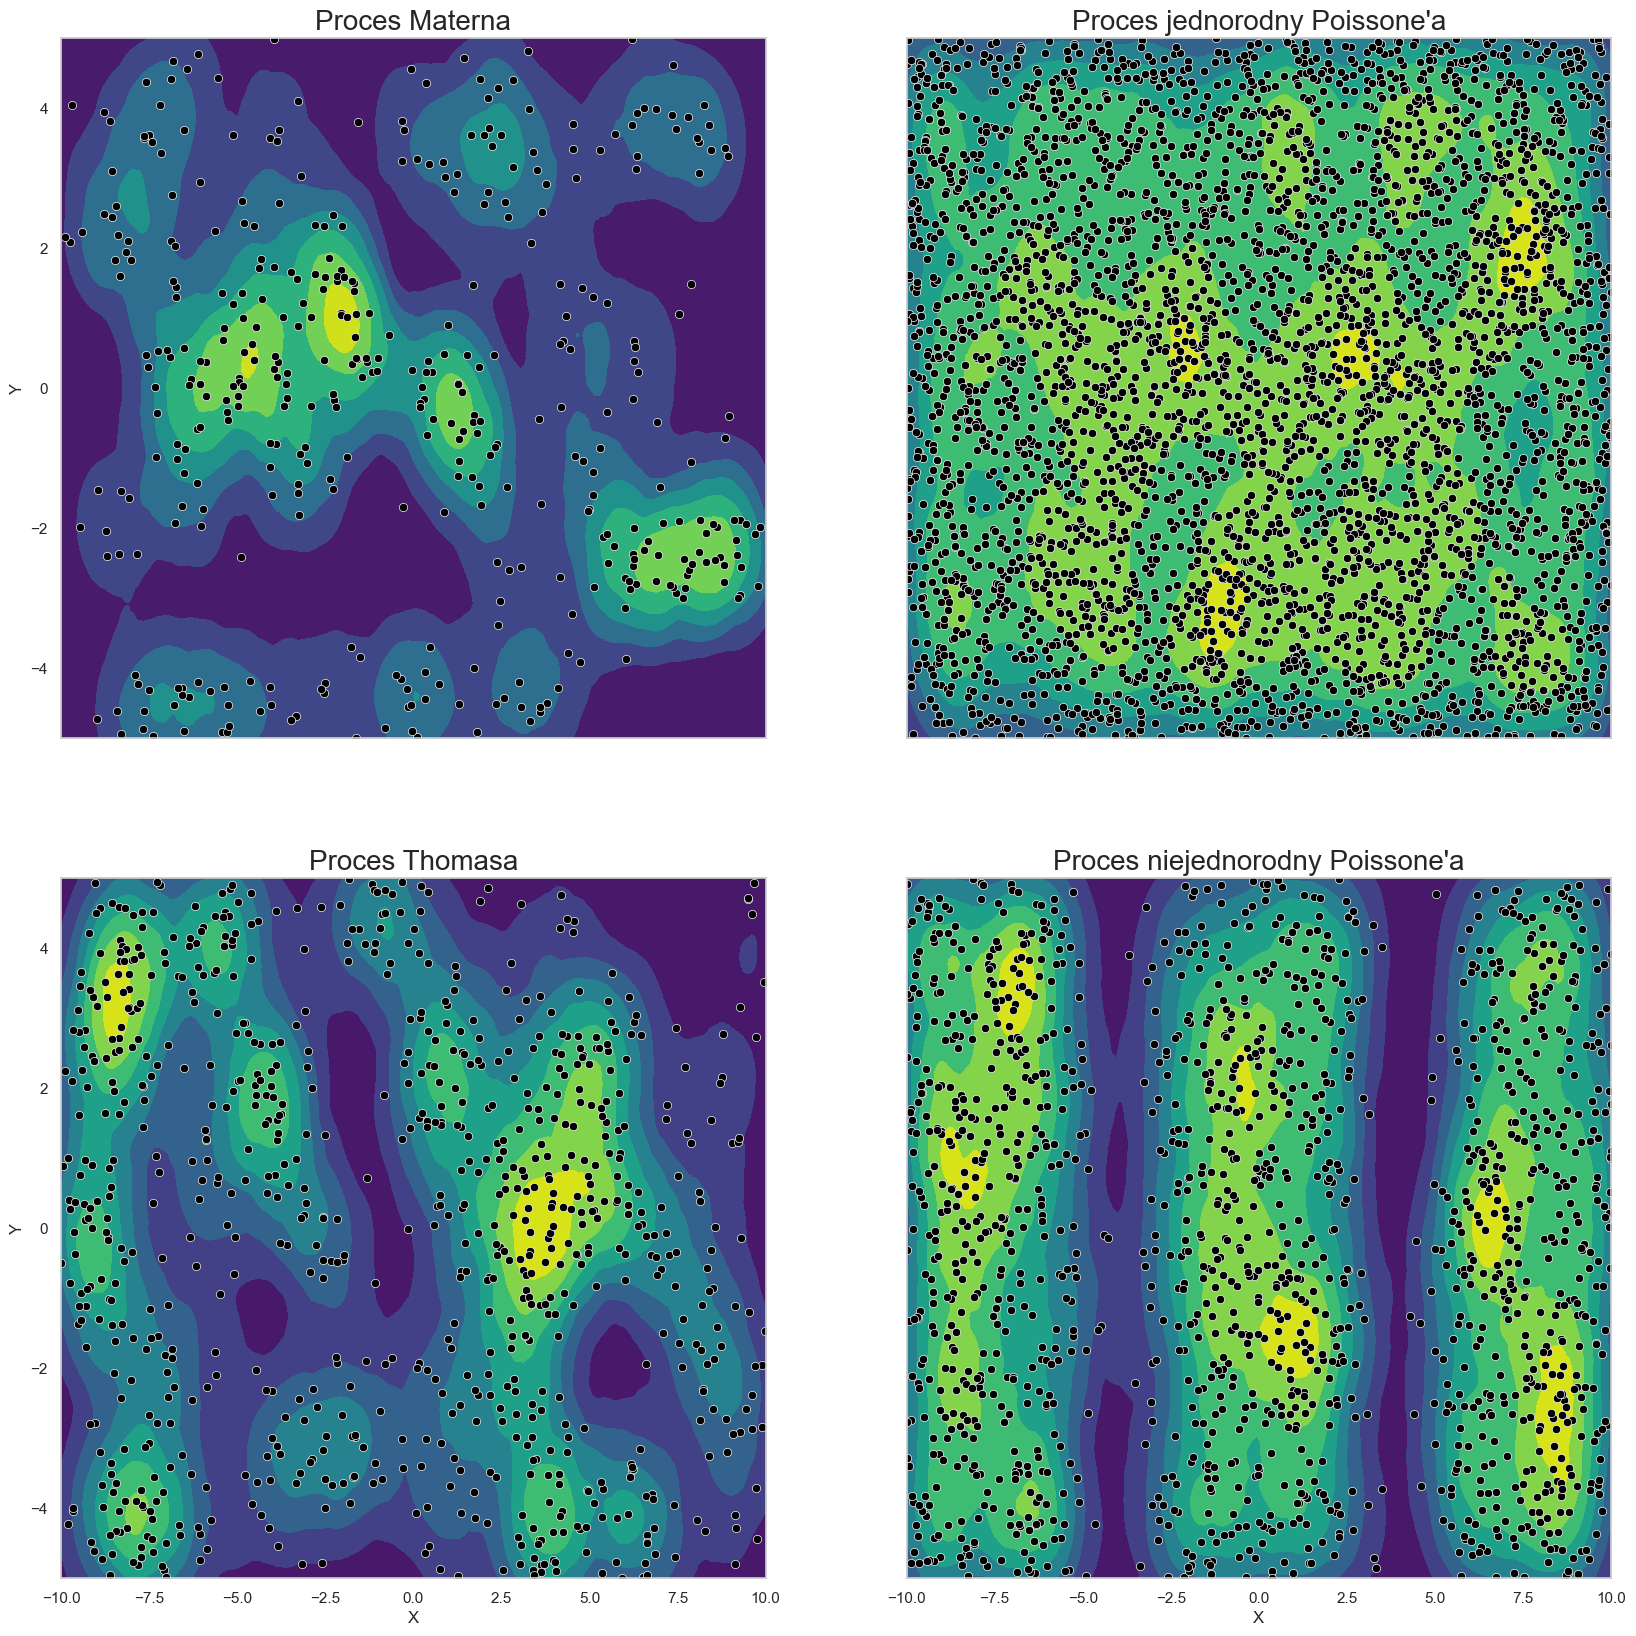

In [9]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20,20))


axs[0,0].tricontourf(df_M['X'], df_M['Y'], df_M['I'], cmap="viridis")
sns.scatterplot(data = M, x = "X",y = "Y", ax = axs[0,0],color = "Black")
axs[0, 0].set_title('Proces Materna', fontsize=20)
axs[0,0].set_xlim(-10,10)
axs[0,0].set_ylim(-5,5)

axs[0,1].tricontourf(df_HP['X'], df_HP['Y'], df_HP['I'], cmap="viridis")
sns.scatterplot(data = HP, x = "X",y = "Y", ax = axs[0,1],color = "Black")
axs[0, 1].set_title("Proces jednorodny Poissone'a", fontsize=20)
axs[0,1].set_xlim(-10,10)
axs[0,1].set_ylim(-5,5)

axs[1,0].tricontourf(df_T['X'], df_T['Y'], df_T['I'], cmap="viridis")
sns.scatterplot(data = T, x = "X",y = "Y", ax = axs[1,0],color = "Black")
axs[1, 0].set_title('Proces Thomasa', fontsize=20)
axs[1,0].set_xlim(-10,10)
axs[1,0].set_ylim(-5,5)

axs[1,1].tricontourf(df_UP['X'], df_UP['Y'], df_UP['I'], cmap="viridis")
sns.scatterplot(data = UP, x = "X",y = "Y", ax = axs[1,1],color = "Black")
axs[1, 1].set_title("Proces niejednorodny Poissone'a", fontsize=20)
axs[1,1].set_xlim(-10,10)
axs[1,1].set_ylim(-5,5)